In [ ]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.5/898.5 kB 16.1 MB/s eta 0:00:00


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving 195.jpg to 195.jpg


In [ ]:
#YOLO
model = YOLO("yolov8m.pt")
#YOLOv8 is a group of neural network models.
#The bigger the model you choose, the better the prediction quality you can achieve, but the slower it will work.
#It will download the yolov8m.pt file from the Ultralytics server to the current folder. Then it will construct the model object.
#Now you can train this model, detect objects, and export it to use in production.

#All YOLOv8 models for object detection ship already pre-trained on the COCO dataset, which is a huge collection of images of 80 different types. So, if you do not have specific needs, then you can just run it as is, without additional training.


100%|██████████| 49.7M/49.7M [00:00<00:00, 161MB/s]


In [ ]:
results = model.predict("195.jpg") #it returns an array with a single item. You can pass multiple images.
#Make sure you use the correct directory. My image is under the same path as my notebook.
result = results[0] #The result contains detected objects


image 1/1 /content/195.jpg: 640x640 1 person, 1 chair, 1 couch, 2 potted plants, 1 bed, 1684.9ms
Speed: 20.4ms preprocess, 1684.9ms inference, 34.7ms postprocess per image at shape (1, 3, 640, 640)


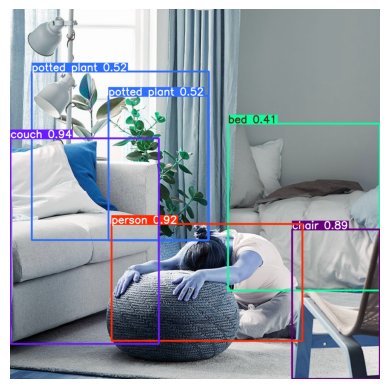

In [ ]:
# Display the image with predictions
annotated_image = result.plot()
plt.imshow(annotated_image)
plt.axis('off')  # Turn off the axes for better visualization
plt.show()

#The code below saves the image with annotations:
# Convert the NumPy array to a PIL Image
annotated_image_pil = Image.fromarray(annotated_image)

# Save the PIL Image
annotated_image_pil.save("detected_objects_195.jpg")

In [ ]:
#The most important one is the boxes array with information about detected bounding boxes on the image. You can determine how many objects it detected by running the len function
len(result.boxes)

6

In [ ]:
print(result.names) #This dictionary has everything that this model can detect.
#Recall that there are 80 classes. It assigns 0 or close to 0 probabilities for those classes which are not in the image

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

In [ ]:
#you can analyze each box either in a loop or manually.
box = result.boxes[0]
print("Object type:", box.cls)
print("Coordinates:", box.xyxy)
print("Probability:", box.conf)

Object type: tensor([57.])
Coordinates: tensor([[  1.1175, 377.9717, 434.8762, 977.5103]])
Probability: tensor([0.9410])


In [ ]:
#Let us get the "actual" data
cords = box.xyxy[0].tolist()
cords = [round(x) for x in cords]
class_id = result.names[box.cls[0].item()]
conf = round(box.conf[0].item(), 2)
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: couch
Coordinates: [1, 378, 435, 978]
Probability: 0.94


In [ ]:
for box in result.boxes:
  class_id = result.names[box.cls[0].item()]
  cords = box.xyxy[0].tolist()
  cords = [round(x) for x in cords]
  conf = round(box.conf[0].item(), 2)
  print("Object type:", class_id) #the ID of object type
  print("Coordinates:", cords) #the coordinates of the box as an array [x1,y1,x2,y2]
  print("Probability:", conf) #the confidence level (probability) of the model about this object using classification. If it's very low, you can ignore.
  print("\nNext Object")

Object type: couch
Coordinates: [1, 378, 435, 978]
Probability: 0.94

Next Object
Object type: person
Coordinates: [297, 627, 854, 968]
Probability: 0.92

Next Object
Object type: chair
Coordinates: [823, 643, 1079, 1079]
Probability: 0.89

Next Object
Object type: potted plant
Coordinates: [63, 183, 581, 675]
Probability: 0.52

Next Object
Object type: potted plant
Coordinates: [288, 254, 579, 675]
Probability: 0.52

Next Object
Object type: bed
Coordinates: [636, 334, 1079, 822]
Probability: 0.41

Next Object


In [ ]:
## FASTER RCNN
import torch
import torchvision.transforms.functional as F
import torchvision.models.detection as detection
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

In [ ]:
#We will use the pre-trained FasterRCNN_ResNet50_FPN model. This model is trained with the COCO dataset
#Let us see the COCO dataset classes. These classes will be printed in the image
from torchvision.models.detection.faster_rcnn import FasterRCNN_ResNet50_FPN_Weights

# Load the metadata for the pre-trained model
weights = FasterRCNN_ResNet50_FPN_Weights.DEFAULT
COCO_CLASSES = weights.meta["categories"]  # Fetch the class names dynamically

print(COCO_CLASSES)

['__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 143MB/s]


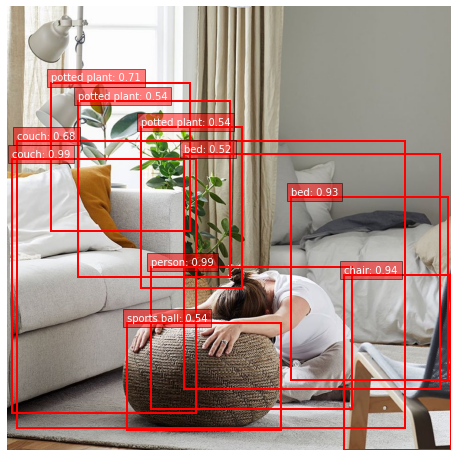

In [ ]:
# Step 1: Load the pre-trained Faster R-CNN model
model = detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Step 2: Load the image
image_path = "195.jpg"
image = Image.open(image_path)
# Convert the image to a tensor in the C (channels), H (height), and W (weight)
image_tensor = F.to_tensor(image) #Converts the input image (loaded using PIL) into a tensor format required by PyTorch models.


# Step 3: Perform object detection
with torch.no_grad():
    predictions = model([image_tensor])

# Step 4: Extract predictions
predicted_boxes = predictions[0]['boxes']  # Bounding boxes
predicted_scores = predictions[0]['scores']  # Confidence scores
predicted_labels = predictions[0]['labels']  # Class indices

#Filter predictions by confidence threshold. Let us assume that we are only interested in those prediction which are above 0.5
confidence_threshold = 0.5
filtered_boxes = []
filtered_scores = []
filtered_labels = []

for box, score, label in zip(predicted_boxes, predicted_scores, predicted_labels):
    if score >= confidence_threshold:
        filtered_boxes.append(box)
        filtered_scores.append(score)
        filtered_labels.append(label)

# Step 5: Annotate the image with bounding boxes and class names
fig, ax = plt.subplots(1, figsize=(12, 8), dpi=72)  # Set the figure size and resolution
ax.imshow(image)

for box, score, label in zip(filtered_boxes, filtered_scores, filtered_labels):
    x_min, y_min, x_max, y_max = box.tolist()
    class_name = COCO_CLASSES[label.item()]  # Map label to class name

    # Draw the bounding box
    rect = patches.Rectangle(
        (x_min, y_min),
        x_max - x_min,
        y_max - y_min,
        linewidth=2,
        edgecolor='red',
        facecolor='none'
    )
    ax.add_patch(rect)

    # Add the class name and score as text
    ax.text(
        x_min,
        y_min - 5,
        f"{class_name}: {score:.2f}",
        color='white',
        fontsize=10,
        bbox=dict(facecolor='red', alpha=0.5)
    )

plt.axis("off")  # Hide axes for better visualization
plt.show()

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving wind.jpg to wind.jpg


In [ ]:
model = YOLO("yolov8m.pt")
#YOLOv8 is a group of neural network models.
#The bigger the model you choose, the better the prediction quality you can achieve, but the slower it will work.
#It will download the yolov8m.pt file from the Ultralytics server to the current folder. Then it will construct the model object.
#Now you can train this model, detect objects, and export it to use in production.

#All YOLOv8 models for object detection ship already pre-trained on the COCO dataset, which is a huge collection of images of 80 different types. So, if you do not have specific needs, then you can just run it as is, without additional training.


In [ ]:
results = model.predict("wind.jpg") #it returns an array with a single item. You can pass multiple images.
#Make sure you use the correct directory. My image is under the same path as my notebook.
result = results[0] #The result contains detected objects


image 1/1 /content/wind.jpg: 384x640 (no detections), 948.5ms
Speed: 3.7ms preprocess, 948.5ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


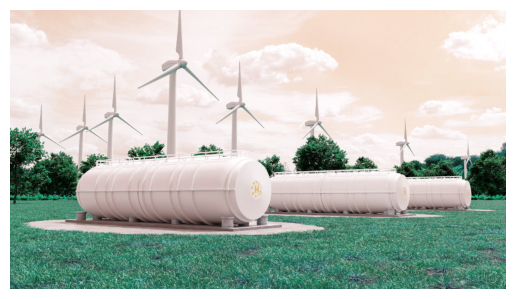

In [ ]:
# Display the image with predictions
annotated_image = result.plot()
plt.imshow(annotated_image)
plt.axis('off')  # Turn off the axes for better visualization
plt.show()

#The code below saves the image with annotations:
# Convert the NumPy array to a PIL Image
annotated_image_pil = Image.fromarray(annotated_image)

# Save the PIL Image
annotated_image_pil.save("detected_objects_wind.jpg")

In [ ]:
#The most important one is the boxes array with information about detected bounding boxes on the image. You can determine how many objects it detected by running the len function
len(result.boxes)

0

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving solar.jpg to solar.jpg


In [ ]:
model = YOLO("yolov8m.pt")
#YOLOv8 is a group of neural network models.
#The bigger the model you choose, the better the prediction quality you can achieve, but the slower it will work.
#It will download the yolov8m.pt file from the Ultralytics server to the current folder. Then it will construct the model object.
#Now you can train this model, detect objects, and export it to use in production.

#All YOLOv8 models for object detection ship already pre-trained on the COCO dataset, which is a huge collection of images of 80 different types. So, if you do not have specific needs, then you can just run it as is, without additional training.


In [ ]:
results = model.predict("solar.jpg") #it returns an array with a single item. You can pass multiple images.
#Make sure you use the correct directory. My image is under the same path as my notebook.
result = results[0] #The result contains detected objects


image 1/1 /content/solar.jpg: 448x640 3 persons, 1094.6ms
Speed: 3.6ms preprocess, 1094.6ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


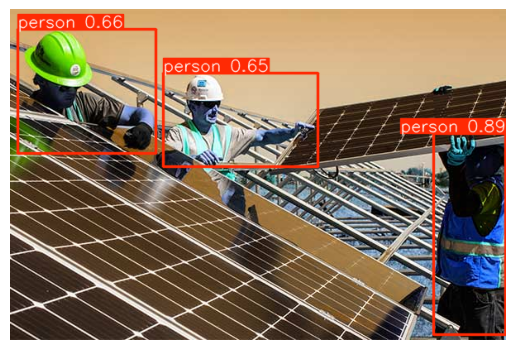

In [ ]:
# Display the image with predictions
annotated_image = result.plot()
plt.imshow(annotated_image)
plt.axis('off')  # Turn off the axes for better visualization
plt.show()

#The code below saves the image with annotations:
# Convert the NumPy array to a PIL Image
annotated_image_pil = Image.fromarray(annotated_image)

# Save the PIL Image
annotated_image_pil.save("detected_objects_solar.jpg")

In [ ]:
#The most important one is the boxes array with information about detected bounding boxes on the image. You can determine how many objects it detected by running the len function
len(result.boxes)

3

In [ ]:
#We will use the pre-trained FasterRCNN_ResNet50_FPN model. This model is trained with the COCO dataset
#Let us see the COCO dataset classes. These classes will be printed in the image
from torchvision.models.detection.faster_rcnn import FasterRCNN_ResNet50_FPN_Weights

# Load the metadata for the pre-trained model
weights = FasterRCNN_ResNet50_FPN_Weights.DEFAULT
COCO_CLASSES = weights.meta["categories"]  # Fetch the class names dynamically

print(COCO_CLASSES)

['__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


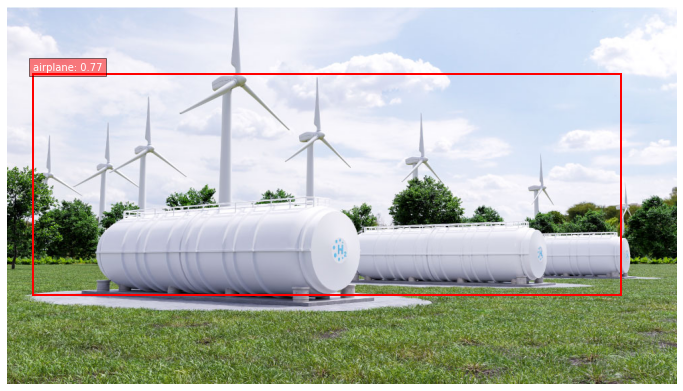

In [ ]:
# Step 1: Load the pre-trained Faster R-CNN model
model = detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Step 2: Load the image
image_path = "wind.jpg"
image = Image.open(image_path)
# Convert the image to a tensor in the C (channels), H (height), and W (weight)
image_tensor = F.to_tensor(image) #Converts the input image (loaded using PIL) into a tensor format required by PyTorch models.


# Step 3: Perform object detection
with torch.no_grad():
    predictions = model([image_tensor])

# Step 4: Extract predictions
predicted_boxes = predictions[0]['boxes']  # Bounding boxes
predicted_scores = predictions[0]['scores']  # Confidence scores
predicted_labels = predictions[0]['labels']  # Class indices

#Filter predictions by confidence threshold. Let us assume that we are only interested in those prediction which are above 0.5
confidence_threshold = 0.5
filtered_boxes = []
filtered_scores = []
filtered_labels = []

for box, score, label in zip(predicted_boxes, predicted_scores, predicted_labels):
    if score >= confidence_threshold:
        filtered_boxes.append(box)
        filtered_scores.append(score)
        filtered_labels.append(label)

# Step 5: Annotate the image with bounding boxes and class names
fig, ax = plt.subplots(1, figsize=(12, 8), dpi=72)  # Set the figure size and resolution
ax.imshow(image)

for box, score, label in zip(filtered_boxes, filtered_scores, filtered_labels):
    x_min, y_min, x_max, y_max = box.tolist()
    class_name = COCO_CLASSES[label.item()]  # Map label to class name

    # Draw the bounding box
    rect = patches.Rectangle(
        (x_min, y_min),
        x_max - x_min,
        y_max - y_min,
        linewidth=2,
        edgecolor='red',
        facecolor='none'
    )
    ax.add_patch(rect)

    # Add the class name and score as text
    ax.text(
        x_min,
        y_min - 5,
        f"{class_name}: {score:.2f}",
        color='white',
        fontsize=10,
        bbox=dict(facecolor='red', alpha=0.5)
    )

plt.axis("off")  # Hide axes for better visualization
plt.show()